# Real Hardware Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Two Qubit POVM

In [30]:
def variational_circuit(n):
    theta = np.random.uniform(-np.pi, np.pi, 4*n)
    circuit = qk.QuantumCircuit(n)
    for i, angle in enumerate(theta[:n]):
        circuit.ry(angle, i)
    
    for i, angle in enumerate(theta[n:2*n]):
        circuit.crx(angle, i, (i+1)%n)
        
    #for i, angle in enumerate(theta[2*n:3*n]):
    #    circuit.ry(angle, i)
        
    #for i, angle in enumerate(theta[3*n:]):
    #    circuit.crx(angle, (n-i)%n, n-i-1)
    
    return circuit

In [31]:
n = 2
d = 2**n
inputs, counts_list = pickle.load(open("../../data/twoQubits_expectation_POVM.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)


targets = counts_to_probs(counts_list[:324])


rank = d**2

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

[[9.3625e-01 4.1813e-02 4.6675e-02 2.1625e-03]
 [3.0600e-02 9.4241e-01 1.7750e-03 5.0375e-02]
 [3.2188e-02 5.6250e-04 9.2142e-01 3.9613e-02]
 [9.6250e-04 1.5213e-02 3.0125e-02 9.0785e-01]]


In [32]:
n = 2
d = 2**n
rank = d**2
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

circuit_target = variational_circuit(n).reverse_bits()
U = Operator(circuit_target).data

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.005),
                        )

In [33]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = inputs,
            targets_val = targets,
            num_iter = 2000,
            N = 324
            )

  0%|          | 0/2000 [00:00<?, ?it/s]

0 0.5906813667789804
1 0.5874156430398626
2 0.5841482647949964
3 0.5808799500378518
4 0.5776107331909001
5 0.5743413198858314
6 0.5710710030994521
7 0.5677984974740241
8 0.5645284541758769
9 0.5612581227555835
10 0.5579886194188777
11 0.5547202261887848
12 0.5514500823913865
13 0.5481786842554742
14 0.5449094431927719
15 0.5416412567529476
16 0.5383744925384717
17 0.5351098592198537
18 0.5318467423878962
19 0.5285857717762859
20 0.5253270886896909
21 0.5220686510272715
22 0.5188112059970487
23 0.515553160272596
24 0.512296845498605
25 0.5090385422115291
26 0.505781623582274
27 0.5025259669574071
28 0.4992733857822
29 0.4960215494603777
30 0.49277137725956827
31 0.4895222418976318
32 0.4862752700144818
33 0.48302895408981433
34 0.4797830468856261
35 0.4765382541190821
36 0.473295474044351
37 0.47005476622913095
38 0.46681619274219416
39 0.4635783810813377
40 0.46034140625952635
41 0.45710631843603056
42 0.4538730247425828
43 0.45064144967029596
44 0.4474073113304294
45 0.444173071235979

352 0.014690414119259046
353 0.014567479238959503
354 0.014446072514855487
355 0.014326125162619583
356 0.01420758500773219
357 0.014090498891712358
358 0.01397484250080294
359 0.013860591864731407
360 0.013747723386104431
361 0.0136362139013252
362 0.01352604076050724
363 0.013417181913764125
364 0.0133096159922979
365 0.013203322374634407
366 0.013098281230881784
367 0.01299447354073111
368 0.01289184388372642
369 0.012790418267264769
370 0.012690179412202704
371 0.012591110668693334
372 0.012493195939865418
373 0.012396419598103576
374 0.012300766400267858
375 0.012206221407568567
376 0.012112751701679062
377 0.012020367102038645
378 0.01192904003625637
379 0.011838767237880805
380 0.011749557989741494
381 0.011661396253495526
382 0.011574265125105182
383 0.011488147197205456
384 0.011403024922058113
385 0.011318842541614435
386 0.011235621469233816
387 0.011153318938420276
388 0.011071952173501862
389 0.01099150793273173
390 0.010911973220833168
391 0.010833335221459201
392 0.01075

680 0.0032136980612481295
681 0.0032068552091350368
682 0.0032000561463211923
683 0.003193300441299487
684 0.003186587673267263
685 0.0031799160435525575
686 0.0031732870136175063
687 0.003166700296134214
688 0.003160155570694852
689 0.003153651948868799
690 0.0031471895226823175
691 0.0031407679378677154
692 0.0031343868356112463
693 0.003128045856293403
694 0.0031217446432867334
695 0.0031154828464435716
696 0.0031092601249747944
697 0.0031030761495113193
698 0.0030969297553109366
699 0.0030908216757583357
700 0.003084751599702896
701 0.0030787192141939375
702 0.0030727242046755723
703 0.0030667662561673884
704 0.0030608450550436653
705 0.0030549602910462715
706 0.003049111659222615
707 0.0030432988041041433
708 0.0030375217444876547
709 0.003031779412092166
710 0.0030260719990361654
711 0.0030203996158730657
712 0.0030147620310220476
713 0.0030091590028490382
714 0.0030035902797501735
715 0.002998055601147548
716 0.0029925546992255756
717 0.002987087301187212
718 0.00298165313178417

1003 0.002198566914788232
1004 0.002197293350440741
1005 0.0021960250165640525
1006 0.0021947619709772174
1007 0.002193504213610536
1008 0.002192251721259077
1009 0.002191004469084133
1010 0.0021897624308469667
1011 0.002188525579356524
1012 0.002187293886993882
1013 0.002186067307156114
1014 0.0021848458445772995
1015 0.002183629478266493
1016 0.0021824181219859988
1017 0.002181211826626526
1018 0.002180010544191571
1019 0.0021788142552512228
1020 0.002177622924119827
1021 0.0021764365146314016
1022 0.002175254990700847
1023 0.002174078250984819
1024 0.0021729063434901253
1025 0.00217173924538336
1026 0.0021705769200196286
1027 0.0021694193668428726
1028 0.002168266564875089
1029 0.0021671184910650415
1030 0.002165975106723252
1031 0.0021648363450944776
1032 0.002163702239139891
1033 0.002162572757964693
1034 0.0021614478701029376
1035 0.0021603275340600627
1036 0.0021592117371855807
1037 0.002158100453558767
1038 0.002156993585225272
1039 0.0021558911905321487
1040 0.0021547932499052

1315 0.0019655597195571916
1316 0.001965139149522601
1317 0.00196471979250695
1318 0.001964301634129298
1319 0.001963884757773528
1320 0.001963469103300451
1321 0.001963054698442793
1322 0.001962641529904055
1323 0.001962229582551098
1324 0.0019618187773096903
1325 0.0019614093274417975
1326 0.0019610008908392614
1327 0.001960593696034229
1328 0.001960187728032074
1329 0.001959782943900041
1330 0.001959379370086296
1331 0.0019589769866427747
1332 0.00195857556981606
1333 0.0019581754726621485
1334 0.001957776447324042
1335 0.001957378615776481
1336 0.001956981966858045
1337 0.001956586486746038
1338 0.001956192152509487
1339 0.0019557989750308
1340 0.001955406913914805
1341 0.0019550159130804798
1342 0.0019546259418126307
1343 0.001954237250820481
1344 0.0019538496135974373
1345 0.0019534631204321494
1346 0.0019530777366901142
1347 0.0019526933956291548
1348 0.001952310174991817
1349 0.0019519280294698572
1350 0.0019515469526037166
1351 0.0019511671226972412
1352 0.0019507882475488236


1624 0.0018769911582058804
1625 0.0018767979532668495
1626 0.0018766051014906379
1627 0.00187641261383717
1628 0.0018762206683941422
1629 0.001876029255596062
1630 0.0018758380867677713
1631 0.0018756473568028694
1632 0.0018754570600048393
1633 0.0018752671885528401
1634 0.001875077732700292
1635 0.0018748886397676433
1636 0.001874699925779271
1637 0.001874511643916744
1638 0.001874323788300182
1639 0.0018741363458864343
1640 0.001873949241173639
1641 0.0018737625222064649
1642 0.0018735761608708328
1643 0.0018733901932864552
1644 0.0018732045758058156
1645 0.0018730194625387589
1646 0.001872834838847143
1647 0.0018726504431440633
1648 0.0018724664413353632
1649 0.0018722828330495535
1650 0.001872099597055519
1651 0.0018719167922110634
1652 0.0018717343988917667
1653 0.001871552428285331
1654 0.0018713708031467622
1655 0.0018711895380891378
1656 0.0018710086477396765
1657 0.0018708281280358713
1658 0.001870647974574273
1659 0.0018704681827029636
1660 0.0018702886862491433
1661 0.001870

1932 0.001832446052137746
1933 0.001832338815495833
1934 0.0018322318058529032
1935 0.0018321249285904297
1936 0.0018320182422712518
1937 0.0018319117535048966
1938 0.00183180544890904
1939 0.001831699312781891
1940 0.0018315933751949468
1941 0.0018314876304773317
1942 0.0018313819922047268
1943 0.0018312765763373985
1944 0.0018311713784709674
1945 0.0018310663209172118
1946 0.0018309614601454156
1947 0.001830856790389031
1948 0.0018307522914830586
1949 0.0018306479678282532
1950 0.0018305438015297352
1951 0.0018304397913252158
1952 0.0018303360080832508
1953 0.0018302323676969558
1954 0.0018301289156650168
1955 0.0018300256496485098
1956 0.0018299225658179633
1957 0.0018298196445949275
1958 0.0018297169237410555
1959 0.0018296143495445086
1960 0.001829511945713801
1961 0.0018294097386210495
1962 0.0018293077130448097
1963 0.0018292058433624985
1964 0.0018291041127651022
1965 0.0018290025907824298
1966 0.0018289012754607345
1967 0.0018288000819128244
1968 0.0018286990713414486
1969 0.0

In [39]:
state_unitary = state_model = np.zeros((1, d, d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex128)[0]
state_model = tf.cast(state_model, dtype=tf.complex128)

observ = np.zeros((1, d))
observ[0, 3] = 1
observ = tf.cast(observ, dtype=tf.complex128)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_list[324:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.povm), observ))

      ┌────────────┐ ┌────────────┐               
q_0: ─┤ Ry(2.8319) ├─┤ Rx(1.4577) ├───────■───────
     ┌┴────────────┴┐└─────┬──────┘┌──────┴──────┐
q_1: ┤ Ry(-0.78829) ├──────■───────┤ Rx(0.61989) ├
     └──────────────┘              └─────────────┘


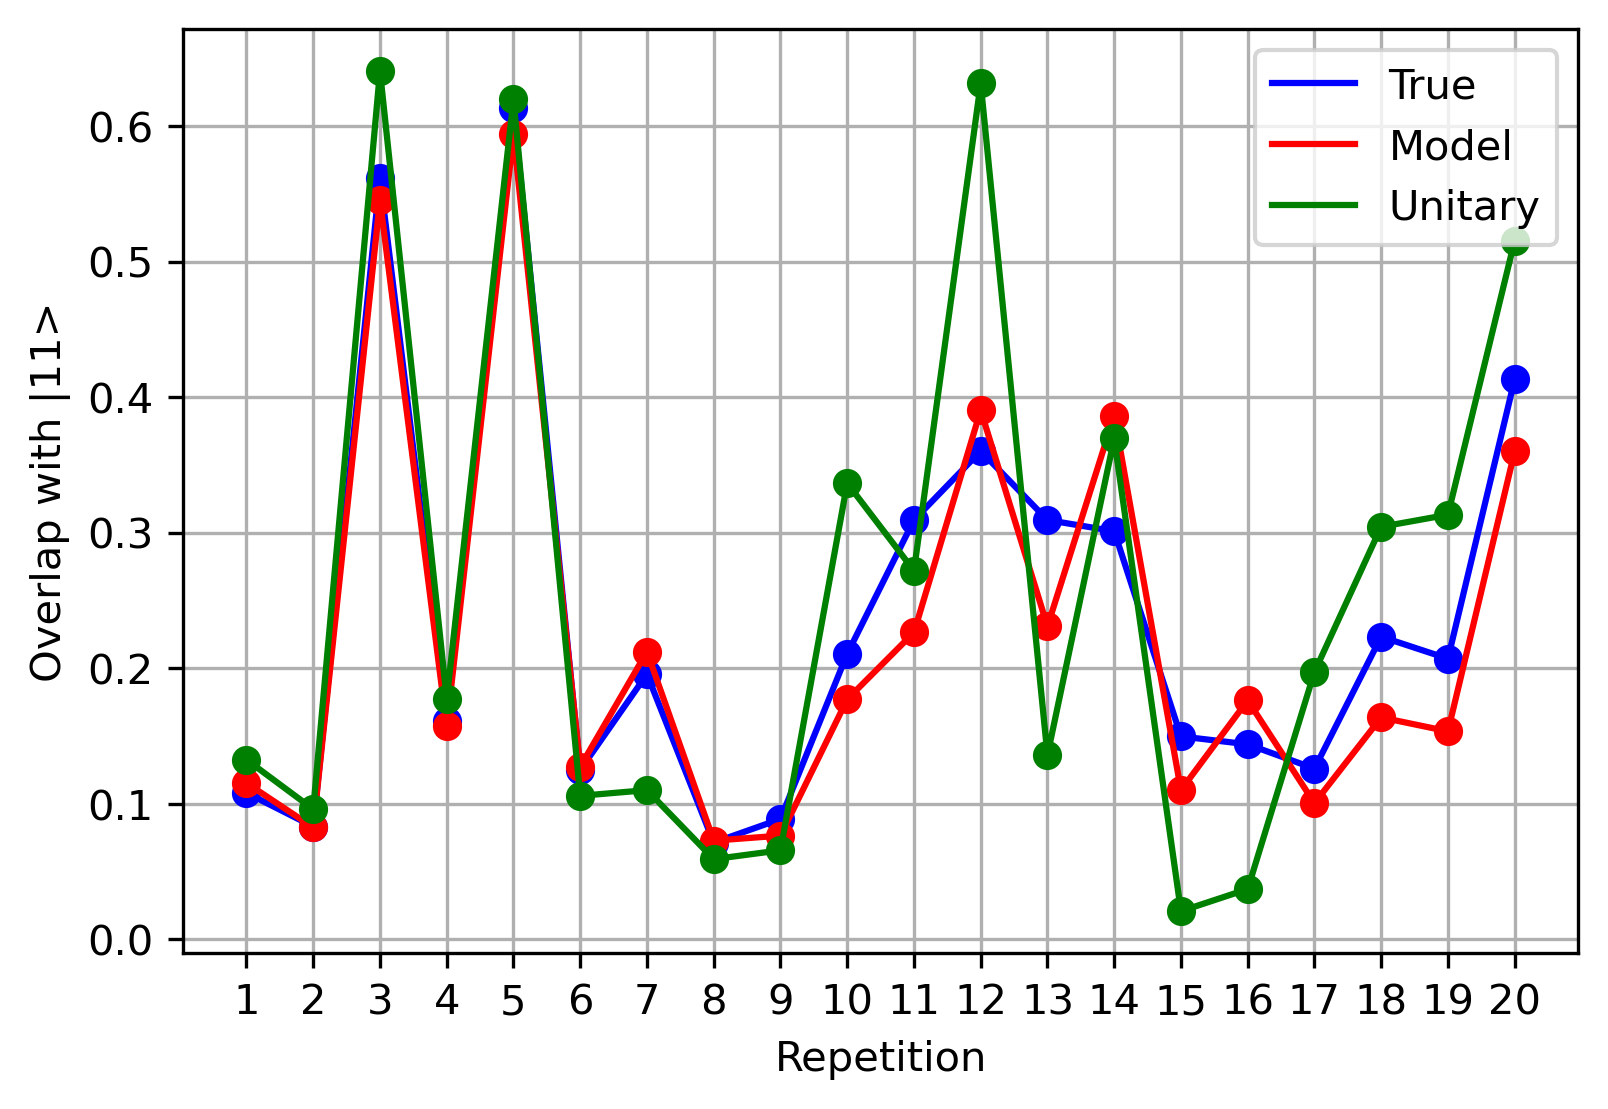

In [41]:
print(circuit_target)

fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |11>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

## Three Qubits 

In [42]:
n = 3
d = 2**n
inputs, counts_list = pickle.load(open("../../data/threeQubits_expectation_POVM_2.p", "rb"))
counts_error = counts_list[1000-64:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)

targets = counts_to_probs(counts_list[:1000-64-20])
rank = d**2

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

circuit_target = variational_circuit(n).reverse_bits()
U = Operator(circuit_target).data

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [43]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = inputs,
            targets_val = targets,
            num_iter = 1000,
            N = 1000-64-20
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

0 0.5353913025044088
1 0.5296013866943262
2 0.5238135340894403
3 0.518030912080594
4 0.5122554466442294
5 0.5064895830000244
6 0.5007340673727092
7 0.49499137126790466
8 0.48926352054153166
9 0.4835507329350516
10 0.47785602479991696
11 0.4721781805300081
12 0.4665187641605457
13 0.46087911488642663
14 0.4552600420006905
15 0.44966470001796965
16 0.4440936974119828
17 0.43854452363154683
18 0.4330197291399485
19 0.42752026835927975
20 0.42204460742708333
21 0.4165933907629228
22 0.4111665632932764
23 0.4057642718782868
24 0.40038918465706963
25 0.3950408658850305
26 0.3897200042834485
27 0.38442335255679344
28 0.37915329527698116
29 0.3739088321015094
30 0.3686904825759523
31 0.3634998483372997
32 0.35833505449424086
33 0.35319579335343276
34 0.34808024506466484
35 0.3429901929931115
36 0.337926748755151
37 0.33288828616598615
38 0.3278734371577547
39 0.32288628638336664
40 0.3179290727948897
41 0.31300185808052106
42 0.3080992633065049
43 0.30322347532934724
44 0.2983782770370283
45 0

340 0.003972494357061103
341 0.003964614311027427
342 0.003956807274031551
343 0.003949072044931243
344 0.00394140745241502
345 0.003933812354054019
346 0.003926285635388012
347 0.003918826209044661
348 0.003911433013890918
349 0.003904105014215683
350 0.0038968411989427553
351 0.003889640580872895
352 0.0038825021959538997
353 0.0038754251025776023
354 0.0038684083809024617
355 0.003861451132200657
356 0.0038545523490993733
357 0.0038477113124996787
358 0.003840927174619104
359 0.0038341991064451716
360 0.00382752629789195
361 0.003820907957890263
362 0.0038143433143326667
363 0.003807831508528012
364 0.003801372021390929
365 0.0037949641302547276
366 0.003788607122899783
367 0.0037823002992393136
368 0.0037760429729341966
369 0.0037698344726799123
370 0.0037636741430007938
371 0.0037575613444848074
372 0.0037514954534832367
373 0.0037454758613707675
374 0.0037395019735065285
375 0.0037335732080542795
376 0.003727688994811573
377 0.0037218487741703154
378 0.003716051996290889
379 0.00

662 0.0029032638211725337
663 0.0029018578920401053
664 0.002900457235341519
665 0.002899061823019532
666 0.0028976716289849185
667 0.0028962866272619144
668 0.0028949067920077645
669 0.0028935320975191337
670 0.0028921625182288797
671 0.00289079802869835
672 0.002889438603610194
673 0.002888084217765807
674 0.0028867348460894504
675 0.002885390463639268
676 0.0028840510456236835
677 0.0028827165674204995
678 0.002881387004595712
679 0.002880062332919218
680 0.002878742528375503
681 0.002877427567168235
682 0.0028761174257188396
683 0.002874812080660064
684 0.0028735115088258712
685 0.0028722156872394012
686 0.0028709245931005977
687 0.002869638203774664
688 0.0028683564967822025
689 0.0028670794497911607
690 0.002865807040610753
691 0.0028645392471867526
692 0.002863276047597866
693 0.0028620174200526334
694 0.0028607633428866268
695 0.0028595137945596483
696 0.0028582687536530126
697 0.0028570281988669153
698 0.00285579210901805
699 0.00285456046303763
700 0.0028533332399698795
701 0

984 0.002627181403736043
985 0.002626677148012934
986 0.002626174267062649
987 0.0026256727560386144
988 0.002625172610116204
989 0.0026246738244926466
990 0.002624176394386877
991 0.0026236803150394513
992 0.002623185581712425
993 0.002622692189689226
994 0.002622200134274561
995 0.0026217094107942995
996 0.0026212200145953515
997 0.002620731941045568
998 0.0026202451855336286
999 0.002619759743468924


      ┌────────────┐                ┌─────────────┐               
q_0: ─┤ Ry(1.4577) ├────────────────┤ Rx(-2.1613) ├───────■───────
      ├────────────┤ ┌─────────────┐└──────┬──────┘       │       
q_1: ─┤ Ry(2.8319) ├─┤ Rx(0.61989) ├───────■──────────────┼───────
     ┌┴────────────┴┐└──────┬──────┘               ┌──────┴──────┐
q_2: ┤ Ry(-0.78829) ├───────■──────────────────────┤ Rx(-2.1615) ├
     └──────────────┘                              └─────────────┘


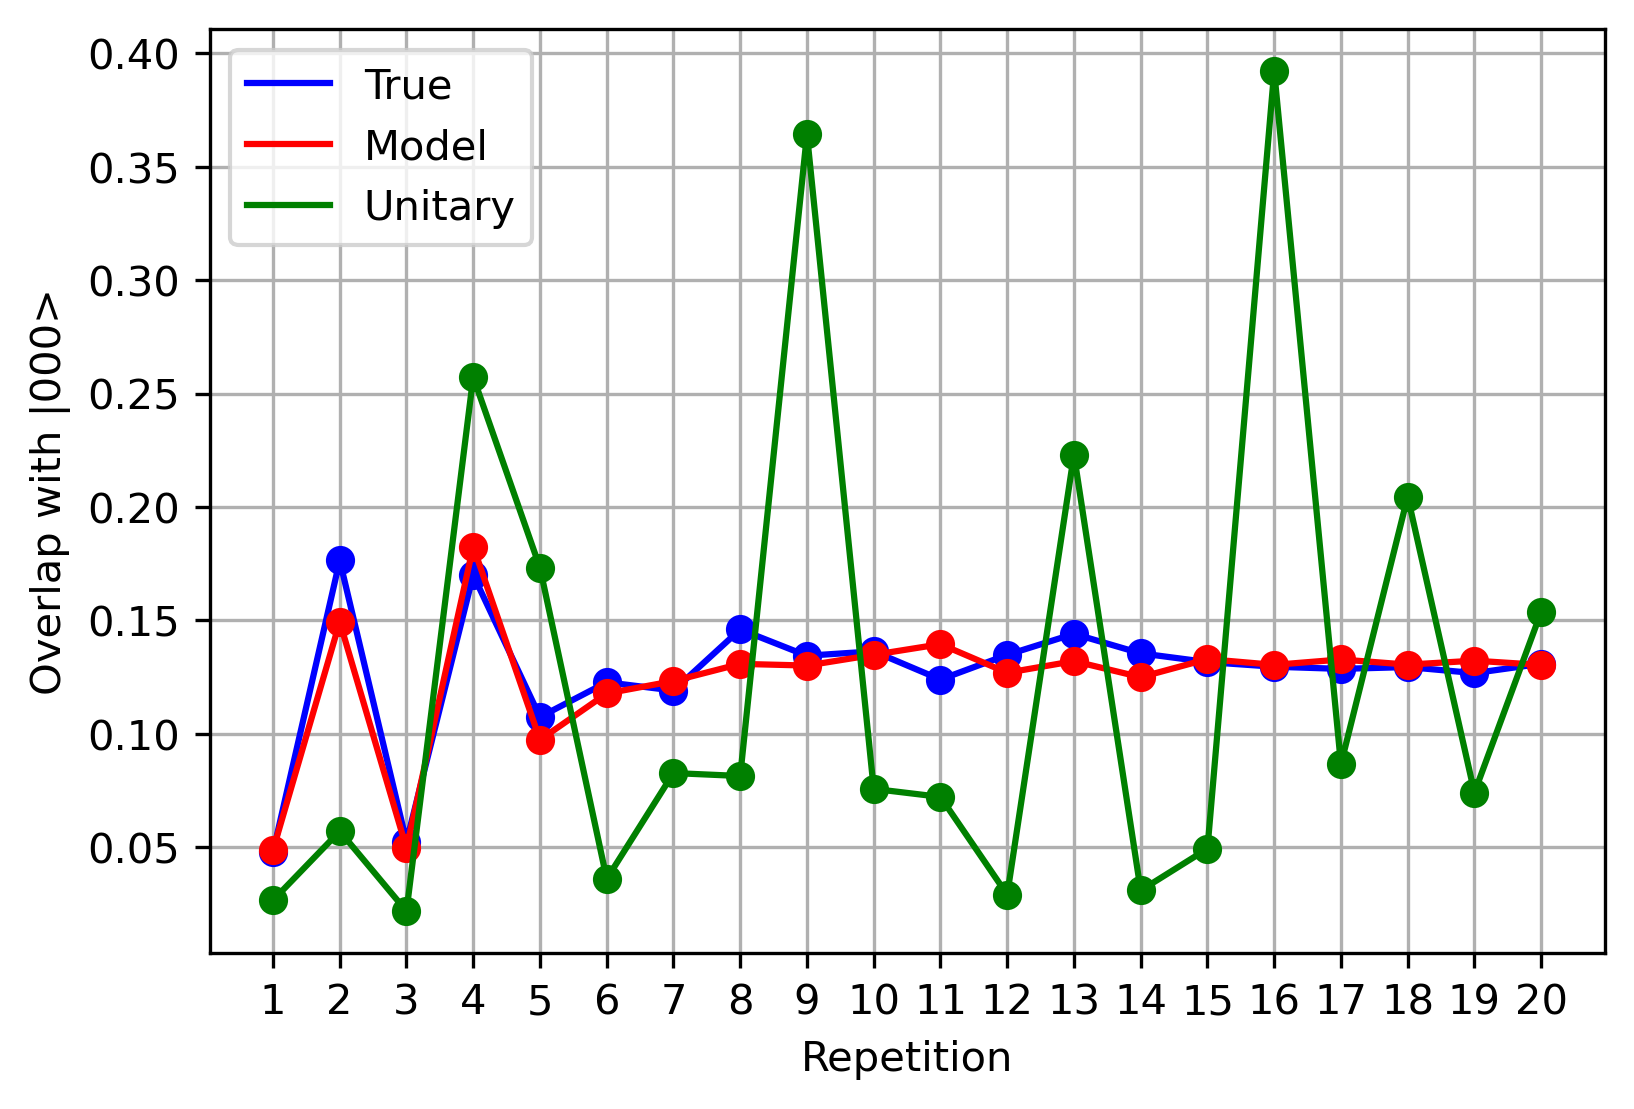

In [44]:
print(circuit_target)

state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex128)
state_model = tf.cast(state_model, dtype=tf.complex128)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex128)
model_expectation_list = []
unitary_expectation_list = []


probs = counts_to_probs(counts_list[1000-20-64:1000-64])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.povm), observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |000>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

In [27]:
state_unitary = state_model = np.zeros((1, d, d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex64)
state_model = tf.cast(state_model, dtype=tf.complex64)

observ = np.zeros((1, d))
observ[0, 1] = 1
observ = tf.cast(observ, dtype=tf.complex64)
model_expectation_list = []
unitary_expectation_list = []


probs = counts_to_probs(counts_list[5000:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

#plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
#plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |001>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

IndexError: list index out of range

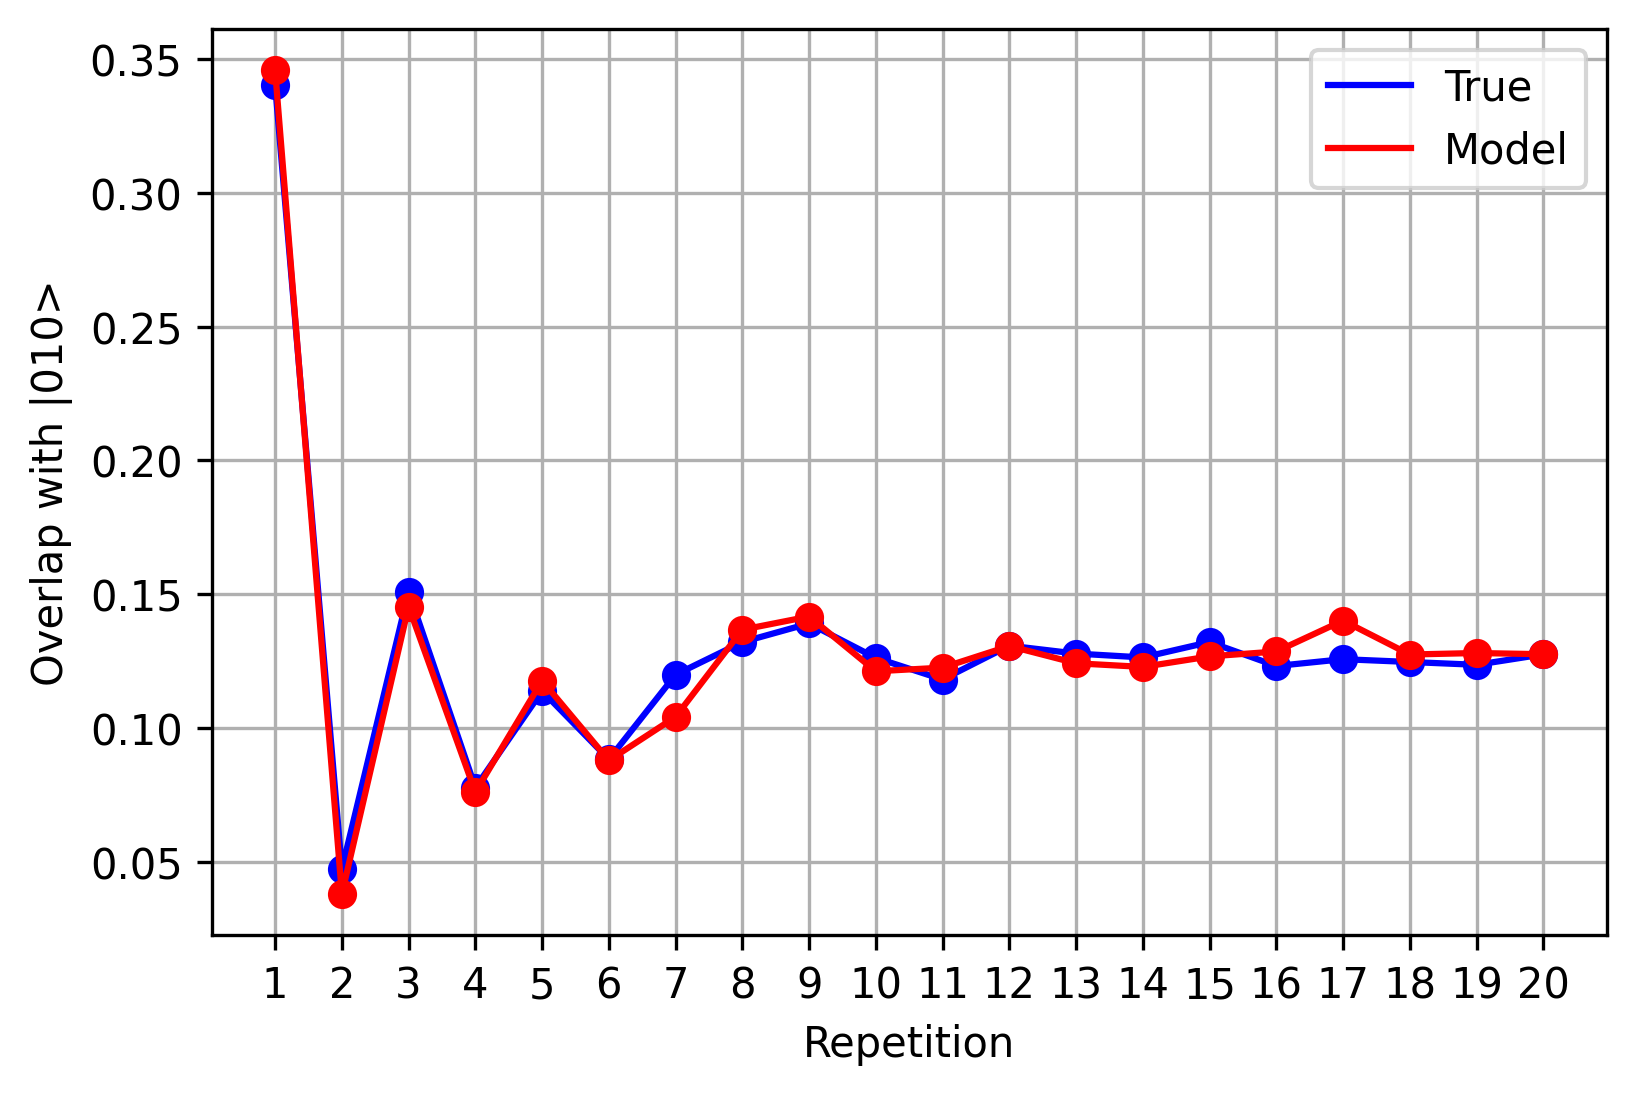

In [26]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex64)
state_model = tf.cast(state_model, dtype=tf.complex64)

observ = np.zeros((1, d))
observ[0, 2] = 1
observ = tf.cast(observ, dtype=tf.complex64)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_list[5000:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

#plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
#plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |010>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

## Four Qubits

In [9]:
n = 4
d = 2**n
inputs, counts_list = pickle.load(open("../../data/fourQubits_expectation_POVM.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)

targets = counts_to_probs(counts_list[:10000])
rank = 16

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [10]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = None,
            targets_val = None,
            num_iter = 1000,
            N = 5000
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

0 0.6399741
1 0.6389576
2 0.6352866
3 0.6260781
4 0.63210535
5 0.6205789
6 0.614908
7 0.6040091
8 0.61736035
9 0.6076142
10 0.6023034
11 0.5887594
12 0.5948284
13 0.58838165
14 0.58190304
15 0.57884103
16 0.5747487
17 0.5590142
18 0.5621957
19 0.5556881
20 0.54731894
21 0.54250175
22 0.53458345
23 0.5380179
24 0.5314019
25 0.5200613
26 0.5216585
27 0.52012163
28 0.51017386
29 0.49536335
30 0.50201476
31 0.49298456
32 0.48947382
33 0.47775355
34 0.4762575
35 0.47018343
36 0.46780878
37 0.46348652
38 0.45862684
39 0.44875428
40 0.44453818
41 0.4438075
42 0.43562117
43 0.4258621
44 0.41790798
45 0.41820902
46 0.4106359
47 0.40677828
48 0.39758542
49 0.39388514
50 0.38835928
51 0.38120556
52 0.3782625
53 0.37438846
54 0.36738762
55 0.36121443
56 0.35650465
57 0.34766057
58 0.34475955
59 0.33862442
60 0.3321897
61 0.3213511
62 0.3198299
63 0.31073827
64 0.31020653
65 0.30121747
66 0.299354
67 0.29426244
68 0.28675014
69 0.2794068
70 0.27718318
71 0.2703459
72 0.26527262
73 0.26113364
74 0.2

KeyboardInterrupt: 

In [ ]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex64)
state_model = tf.cast(state_model, dtype=tf.complex64)

observ = np.zeros((1, d))
observ[0, 1] = 1
observ = tf.cast(observ, dtype=tf.complex64)
model_expectation_list = []
unitary_expectation_list = []


probs = counts_to_probs(counts_list[5000:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |001>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

## Two Qubits, Two Blocks

In [ ]:
n = 3
d = 2**n
inputs, counts_list = pickle.load(open("../../data/twoQubits_twoBlocks.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)

targets = counts_to_probs(counts_list[:5000])
rank = 8

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [ ]:
target_list = []
input_list_ = []
for input, counts in zip(input_list, counts_list):
    target_list.append(counts_to_probs(counts))
    state, U_basis, obs = input
    input_list_.append([tf.cast(state, dtype=tf.complex64), tf.cast(U_basis, dtype=tf.complex64), obs])

input_list = input_list_

input_train1, input_train2 = input_list[:324], input_list[324:]
target_train1, target_train2 = target_list[:324], target_list[324:]

In [ ]:
rank = 8
np.random.seed(42)
random.seed(42)


kraus_model1 = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model1 = ModelQuantumMap(
                        q_map = kraus_model1,
                        loss = probs_loss,
                        input_list = input_train1,
                        target_list = target_train1,
                        input_val_list = input_train1,
                        target_val_list = target_train1,
                        optimizer = tf.optimizers.Adam(learning_rate=0.05),
                        )

kraus_model2 = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model2 = ModelQuantumMap(
                        q_map = kraus_model2,
                        loss = probs_loss,
                        input_list = input_train2,
                        target_list = target_train2,
                        input_val_list = input_train2,
                        target_val_list = target_train2,
                        optimizer = tf.optimizers.Adam(learning_rate=0.05),
                        )

In [ ]:
model1.train(num_iter = 200,
             N = 50
            )

In [ ]:
model2.train(num_iter = 200,
             N = 50
            )

In [ ]:
state = np.zeros((d,d))
state[0,0] = 1
state = tf.cast(state, dtype=tf.complex64)

observ = np.zeros(d)
observ[0] = 1
observ = tf.cast(observ, dtype=tf.complex64)

state = model1.q_map.apply_map(state)
state = model2.q_map.apply_map(state)
probs_model = np.abs(measurement(state, povm = povm).numpy())

probs_true = counts_to_probs(counts_list[2*324])

print("Model:", probs_model)
print("True:", probs_true)

## Three Qubits, Two Blocks

In [ ]:
n = 3
d = 2**n
input_list, counts_list = pickle.load(open("../../data/threeQubits_twoBlocks.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)
print(sum(povm))
print(corr_mat)

In [ ]:
target_list = []
input_list_ = []
for input, counts in zip(input_list, counts_list):
    target_list.append(counts_to_probs(counts))
    state, U_basis, obs = input
    input_list_.append([tf.cast(state, dtype=tf.complex64), tf.cast(U_basis, dtype=tf.complex64), obs])

input_list = input_list_

input_train1, input_train2 = input_list[:1000], input_list[1000:]
target_train1, target_train2 = target_list[:1000], target_list[1000:]

In [ ]:
rank = 16
np.random.seed(42)
random.seed(42)


kraus_model1 = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model1 = ModelQuantumMap(
                        q_map = kraus_model1,
                        loss = probs_loss,
                        input_list = input_train1,
                        target_list = target_train1,
                        input_val_list = input_train1[:100],
                        target_val_list = target_train1[:100],
                        optimizer = tf.optimizers.Adam(learning_rate=0.05),
                        )

kraus_model2 = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model2 = ModelQuantumMap(
                        q_map = kraus_model2,
                        loss = probs_loss,
                        input_list = input_train2,
                        target_list = target_train2,
                        input_val_list = input_train2[:100],
                        target_val_list = target_train2[:100],
                        optimizer = tf.optimizers.Adam(learning_rate=0.05),
                        )

In [ ]:
model1.train(num_iter = 200,
             N = 50
            )

In [ ]:
model2.train(num_iter = 200,
             N = 50
            )

In [ ]:
state = np.zeros((d,d))
state[0,0] = 1
state = tf.cast(state, dtype=tf.complex64)

observ = np.zeros(d)
observ[0] = 1
observ = tf.cast(observ, dtype=tf.complex64)

state = model1.q_map.apply_map(state)
state = model2.q_map.apply_map(state)
probs_model = np.abs(measurement(state, povm = povm).numpy())

probs_true = counts_to_probs(counts_list[2*1000])

print("Model:", probs_model)
print("True:", probs_true)

## Optimize POVM

In [12]:
def variational_circuit(n):
    theta = np.random.uniform(-np.pi, np.pi, 4*n)
    circuit = qk.QuantumCircuit(n)
    for i, angle in enumerate(theta[:n]):
        circuit.ry(angle, i)
    
    for i, angle in enumerate(theta[n:2*n]):
        circuit.crx(angle, i, (i+1)%n)
        
    #for i, angle in enumerate(theta[2*n:3*n]):
    #    circuit.ry(angle, i)
        
    #for i, angle in enumerate(theta[3*n:]):
    #    circuit.crx(angle, (n-i)%n, n-i-1)
    
    return circuit

In [5]:
n = 2
d = 2**n
inputs, counts_list, povm_inputs, counts_povm_list = pickle.load(open("../../data/twoQubits_expectation_POVM.p", "rb"))
targets = counts_to_probs(counts_list[:324])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = Operator(variational_circuit(n).reverse_bits()).data



povm_targets = counts_to_probs(counts_povm_list)

povm_model = POVM(
                  d=d, 
                  optimizer = tf.optimizers.Adam(learning_rate=0.01)
                 )

In [6]:
povm_model.train(1000, povm_inputs, povm_targets, N = 36)

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.8011154020557671-7.841336937443121e-18j)
(0.7854134978648792-1.5774207638011945e-17j)
(0.7697402886022565-1.6269363108589852e-17j)
(0.7541570516660867+2.859618814351046e-17j)
(0.7386657984555188+3.0416621893741044e-17j)
(0.7232799208705271+5.75614018667866e-17j)
(0.7079894215579722+3.163749814683519e-17j)
(0.6928532211195623-2.2038804458932313e-17j)
(0.677892071587225-4.106703573648502e-17j)
(0.663126758480154+3.492037899598216e-17j)
(0.6485773660078045-1.040707125246009e-17j)
(0.6342502662959169-5.044314979837727e-17j)
(0.62018656570925-2.563450538288996e-18j)
(0.6063991580473066+1.238470282156832e-17j)
(0.5928944069907475+3.5601467623481004e-17j)
(0.5796259591133243+1.515713945261184e-17j)
(0.5666356014047351+1.9888840809370146e-17j)
(0.5539324955275966+1.9366312378392388e-17j)
(0.5415226109133434+4.324887360752793e-17j)
(0.5293973142121687+1.3086657546710275e-17j)
(0.5175227833125305+1.5774051605446054e-18j)
(0.505811376120219-1.9932726633828036e-17j)
(0.4943187843385206+5.210595

(0.005834521523721674-3.980597103686134e-18j)
(0.005732210958359172+2.083020031814988e-18j)
(0.005632153189359318+2.3435375690357463e-18j)
(0.005534283512378615-5.4926402853286445e-18j)
(0.0054385416163154916+8.648546413703676e-18j)
(0.0053448711666682115-4.008017079222056e-18j)
(0.005253219370582433-5.150166240694226e-19j)
(0.005163536517227167+3.246944157476012e-18j)
(0.005075775494267404-6.4336827283993185e-19j)
(0.004989891289306026+6.278799043762392e-18j)
(0.004905840492590698-3.503840547129316e-18j)
(0.004823580822753609-1.3311438604345452e-18j)
(0.004743070699898816+4.533599866900726e-19j)
(0.004664268889600131-2.0710170700399647e-18j)
(0.004587134237370186-2.01887925318785e-19j)
(0.0045116255065221385-1.0724572351665208e-18j)
(0.004437701323990997-9.027869181380859e-19j)
(0.004365320229797+1.7306933809443351e-18j)
(0.004294440817609836-4.452583527522933e-19j)
(0.004225021947303993-1.5235554592006685e-18j)
(0.004157023006173656+9.311321105657482e-19j)
(0.004090404193861497+1.866

(0.0006286491016600991-6.882354329764842e-19j)
(0.0006229561607371727+7.634805478741548e-19j)
(0.0006173359910230591+3.2644261728010804e-19j)
(0.0006117861685433307-1.5936364686173741e-18j)
(0.0006063043870019104+4.318373498739302e-20j)
(0.0006008886227930987+5.172448368392637e-19j)
(0.0005955372163067234+2.3865196768663315e-19j)
(0.0005902488716540257-8.752996200196294e-19j)
(0.0005850225914078587-1.4920459123172823e-18j)
(0.0005798575716719528+4.63040375747259e-19j)
(0.000574753085251175-3.040808286344024e-19j)
(0.0005697083776241101-3.6055852456483543e-19j)
(0.0005647225934013773+2.529513811774882e-19j)
(0.0005597947420089368-9.615993651375497e-19j)
(0.0005549237024414378-2.412796392983482e-19j)
(0.0005501082597154087-7.414071693454496e-19j)
(0.0005453471611090803+3.9159524205330934e-19j)
(0.0005406391787520427-1.7077857550695586e-19j)
(0.0005359831663417609+7.992376818200144e-19j)
(0.0005313781009822111-7.217290102349244e-19j)
(0.0005268231054094098-8.279857534260647e-19j)
(0.00052

(0.00018074840968122384+1.3315798442104559e-20j)
(0.00017980550411276429+2.3745839203979426e-19j)
(0.0001788706405420354-2.1020317421039988e-19j)
(0.00017794372771298356+1.8763613998344085e-20j)
(0.00017702467592271953-3.00759990778149e-19j)
(0.00017611339740288698-1.3740347723802174e-19j)
(0.00017520980660926631-2.964178987537637e-19j)
(0.0001743138204158669-1.6720744117110974e-19j)
(0.00017342535821632723-3.1190750415497815e-19j)
(0.00017254434193859805+1.3429394000926453e-20j)
(0.00017167069597994088+1.5905167693632262e-19j)
(0.00017080434706961514+1.4915876915314359e-19j)
(0.0001699452240666084+8.5626988858438e-20j)
(0.0001690932577002937-7.651684252341535e-20j)
(0.00016824838026346708+1.6638057873521016e-19j)
(0.00016741052527119346-2.398366581941373e-19j)
(0.00016657962710060675+1.667698068796319e-20j)
(0.00016575562063328507-7.22565661754011e-20j)
(0.0001649384409211051-5.260620079524552e-19j)
(0.00016412802289999685-2.5581962207296654e-19j)
(0.000163324301171371+7.8647497457184

(8.88610288699143e-05+6.774766485775093e-20j)
(8.860654622031686e-05-4.2114899707302865e-20j)
(8.835355307821207e-05+1.8647207663977077e-19j)
(8.810203687411558e-05-1.2885778271413299e-19j)
(8.785198526769063e-05+6.225487217128852e-20j)
(8.76033861305055e-05-1.3257067134673195e-19j)
(8.735622752273189e-05-2.017036352886434e-20j)
(8.711049766576721e-05+1.114458126822664e-19j)
(8.686618491218264e-05-3.885105516379944e-20j)
(8.662327771506545e-05-6.290435826013242e-20j)
(8.638176459864091e-05+5.262117203961307e-20j)
(8.614163413205295e-05+5.170162121152329e-20j)
(8.590287490784866e-05+1.8188840067077212e-19j)
(8.566547552656427e-05-5.2894595762243536e-20j)
(8.542942458821754e-05+1.9237313959559032e-19j)
(8.519471069112868e-05-4.8402118640269204e-20j)
(8.496132243798712e-05+9.702854327344965e-20j)
(8.472924844831735e-05-1.320212404038825e-19j)
(8.449847737648954e-05+1.841017428213737e-20j)
(8.426899793358791e-05-4.87158544666293e-20j)
(8.404079891160765e-05-3.946015572218111e-21j)
(8.38138

(5.903218510553646e-05+7.31595892581058e-20j)
(5.89196725706061e-05-3.799190039980748e-20j)
(5.8807569522016984e-05+1.30247547166862e-19j)
(5.869587384710964e-05+9.177157441076531e-20j)
(5.858458345556807e-05+5.563691980888195e-20j)
(5.8473696282354446e-05+4.402713424089032e-20j)
(5.83632102904081e-05-1.7221098357225366e-20j)
(5.825312347300559e-05-3.3151094171501584e-20j)
(5.814343385544538e-05-4.19406768611061e-20j)
(5.803413949602417e-05-1.3312001297092745e-19j)
(5.792523848615653e-05-7.226374489317773e-21j)
(5.7816728949626636e-05-3.4907827150299673e-22j)
(5.7708609041065895e-05-5.02510148984674e-20j)
(5.7600876943727186e-05+5.65915135250555e-20j)
(5.749353086675866e-05+1.0811273480106599e-19j)
(5.738656904215092e-05+2.3822207358897592e-20j)
(5.727998972161782e-05+2.297511618393317e-20j)
(5.717379117360275e-05+1.1806223666875803e-20j)
(5.706797168067396e-05-5.717981585470654e-20j)
(5.6962529537451575e-05+5.743235154656965e-20j)
(5.6857463049218985e-05-9.35228107907634e-20j)
(5.6752

In [7]:
rank = d**2

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm_model.povm,
#                        povm = povm_ideal(n)
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [8]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = inputs,
            targets_val = targets,
            num_iter = 1000,
            N = 324
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

0 0.513751597607631
1 0.5072305826046405
2 0.5007207437147391
3 0.4942261103546294
4 0.4877478785695936
5 0.4812817690402122
6 0.4748339803318891
7 0.46840710060670543
8 0.46199544849709867
9 0.45560474700866704
10 0.4492364172745696
11 0.4428824998463526
12 0.4365581152279008
13 0.4302514616027383
14 0.42396625623321565
15 0.41770706337611635
16 0.4114835834909918
17 0.40529883710302333
18 0.3991433529354989
19 0.3930232152399462
20 0.38694446983646097
21 0.3809030499198093
22 0.37490519102603104
23 0.3689473204906195
24 0.3630289236476712
25 0.35715146090330036
26 0.3513068562158691
27 0.34547910396404524
28 0.3396973196365375
29 0.3339513829717411
30 0.32824195225538616
31 0.322550318077953
32 0.316902906636754
33 0.31128124544145774
34 0.30570007295718177
35 0.3001446043407805
36 0.29464037485424893
37 0.28918086256720427
38 0.283766358735918
39 0.2783987484980305
40 0.2730831382804917
41 0.2678088907175701
42 0.262584985402026
43 0.257402956947099
44 0.25226481986669264
45 0.24717

341 0.00046816117625590937
342 0.00046560714578507785
343 0.00046309035966105873
344 0.0004606100156872657
345 0.00045816533134571396
346 0.0004557555472593414
347 0.0004533799776758085
348 0.00045103788013299594
349 0.00044872853136524625
350 0.0004464512269245636
351 0.00044420528079100013
352 0.0004419900249602095
353 0.00043980480900158666
354 0.0004376489995858739
355 0.00043552197998575386
356 0.00043342314955672584
357 0.0004313519232076957
358 0.00042930773087168883
359 0.00042729001698657955
360 0.0004252982399944721
361 0.00042333187186612475
362 0.0004213903976545638
363 0.00041947331507961134
364 0.0004175801341428767
365 0.00041571037677123375
366 0.00041386357648551557
367 0.0004120392780906557
368 0.0004102370373833335
369 0.0004084564208734387
370 0.00040669700551612263
371 0.0004049583784519473
372 0.00040324013675315526
373 0.00040154188717483576
374 0.00039986324591015734
375 0.0003982038383493199
376 0.0003965632988420955
377 0.0003949412704639954
378 0.000393337404

652 0.00020708964538745055
653 0.00020678057706423296
654 0.00020647272768151454
655 0.00020616609103923545
656 0.0002058606609907059
657 0.00020555643144190233
658 0.000205253396350775
659 0.00020495154972655614
660 0.00020465088562907733
661 0.00020435139816809124
662 0.0002040530815026012
663 0.00020375592984019444
664 0.00020345993743638442
665 0.00020316509859396196
666 0.00020287140766234749
667 0.00020257885903696062
668 0.0002022874471585895
669 0.00020199716651277008
670 0.00020170801162917913
671 0.0002014199770810289
672 0.00020113305748447244
673 0.00020084724749802098
674 0.00020056254182196115
675 0.00020027893519779268
676 0.00019999642240766088
677 0.0001997149982738075
678 0.00019943465765802235
679 0.00019915539546110596
680 0.00019887720662233879
681 0.00019860008611895523
682 0.00019832402896562557
683 0.00019804903021394308
684 0.00019777508495191976
685 0.000197502188303485
686 0.00019723033542798927
687 0.0001969595215197181
688 0.00019668974180740215
689 0.00019

970 0.00014902764872970126
971 0.00014892543967901818
972 0.0001488235264187008
973 0.00014872190767361613
974 0.00014862058217566238
975 0.0001485195486637378
976 0.00014841880588371294
977 0.00014831835258839892
978 0.00014821818753751453
979 0.0001481183094976589
980 0.00014801871724227835
981 0.00014791940955163576
982 0.0001478203852127799
983 0.0001477216430195146
984 0.00014762318177236568
985 0.00014752500027855156
986 0.00014742709735195156
987 0.0001473294718130727
988 0.00014723212248901957
989 0.0001471350482134627
990 0.00014703824782660675
991 0.0001469417201751577
992 0.00014684546411229232
993 0.00014674947849762564
994 0.0001466537621971782
995 0.00014655831408334652
996 0.00014646313303486822
997 0.00014636821793679206
998 0.00014627356768044428
999 0.00014617918116339727


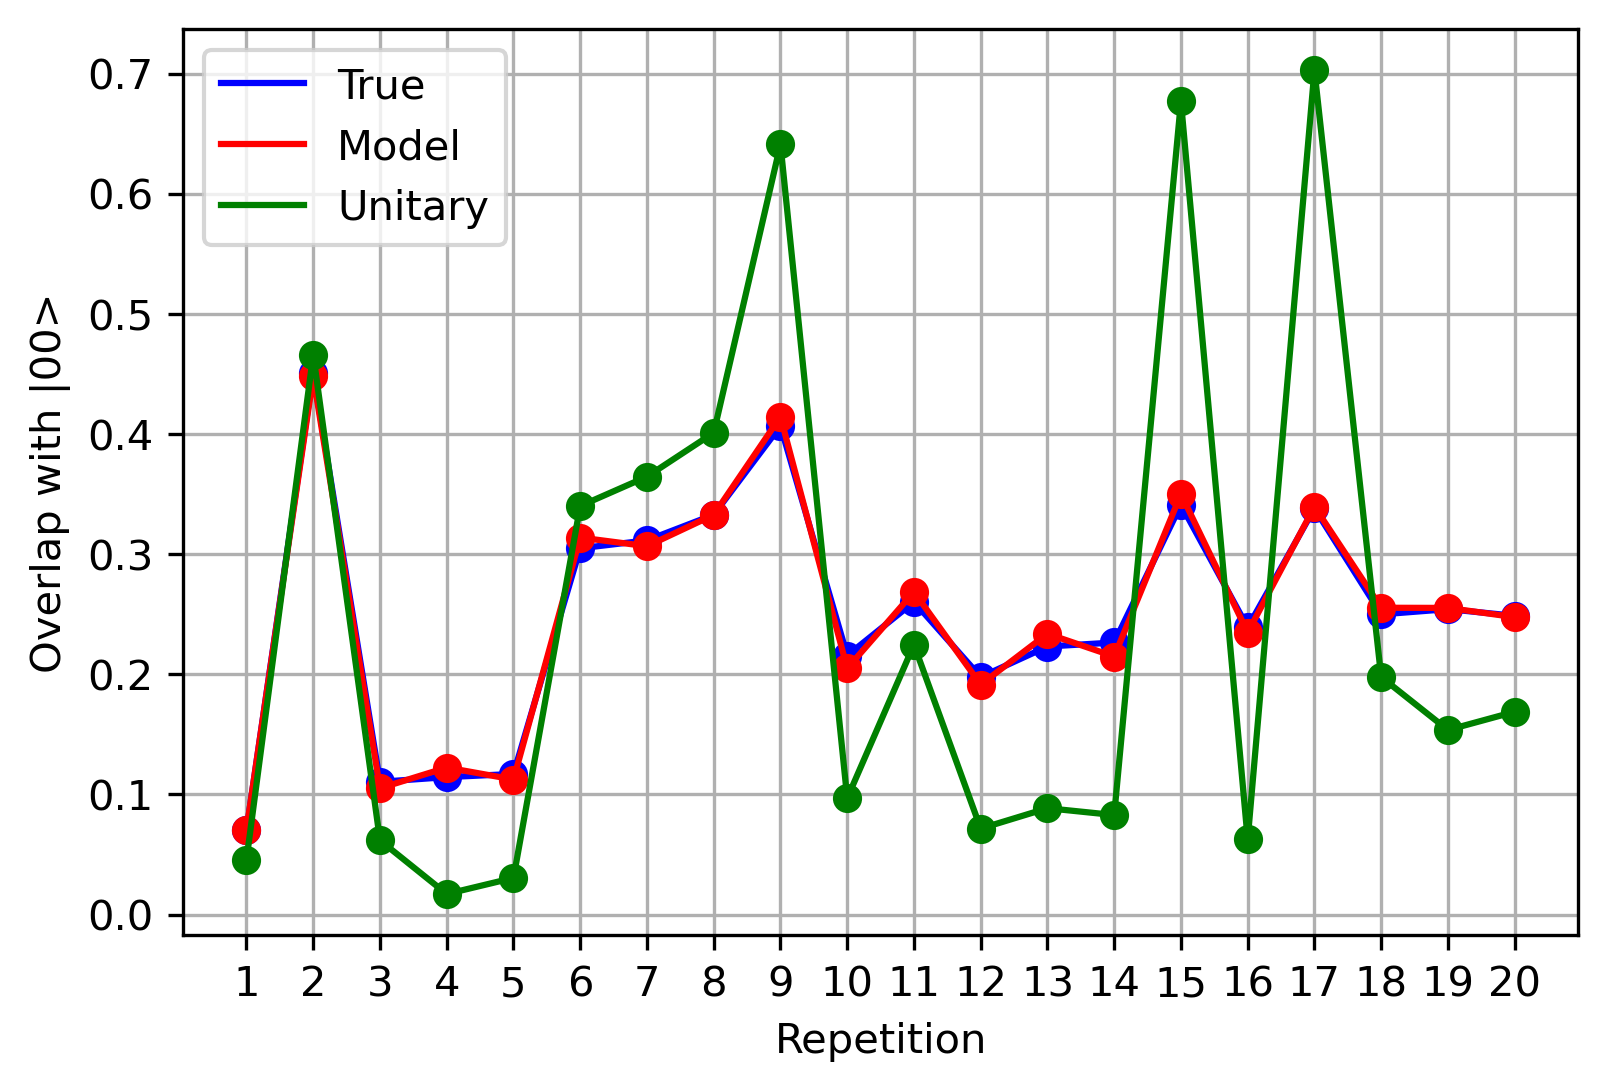

In [11]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex128)
state_model = tf.cast(state_model, dtype=tf.complex128)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex128)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_list[324:])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.povm), observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |00>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

### Three Qubits

In [13]:
n = 3
d = 2**n
inputs, counts_list, povm_inputs, counts_povm_list = pickle.load(open("../../data/threeQubits_expectation_POVM.p", "rb"))
targets = counts_to_probs(counts_list[:5000])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = Operator(variational_circuit(n).reverse_bits()).data



povm_targets = counts_to_probs(counts_povm_list)

povm_model = POVM(
                  d=d, 
                  optimizer = tf.optimizers.Adam(learning_rate=0.01)
                 )

In [14]:
povm_model.train(1000, povm_inputs, povm_targets, N = 216)

  0%|          | 0/1000 [00:00<?, ?it/s]

(1.4082537502505705-3.800319839324536e-17j)
(1.391723717898492-1.6528315825168782e-17j)
(1.375279431129392+7.146575821470319e-17j)
(1.358927392122881-1.9349135741220986e-18j)
(1.3426604874915105+6.197540605653615e-17j)
(1.3265009233222593+1.9637662550238624e-17j)
(1.3104478544144769+1.2691327917428371e-17j)
(1.294506271598307+1.0094955872338275e-17j)
(1.2786923277892328-6.660404350836389e-17j)
(1.2629979430946576+7.210178476618777e-18j)
(1.2474222941703563-2.156220184020972e-19j)
(1.2319840938906697+1.010036464220414e-17j)
(1.216677798803155-5.3785991063537224e-18j)
(1.201525996555457+5.4418470520097466e-18j)
(1.1864999589088743-1.226091296075435e-17j)
(1.1716229219702923+1.2814681279813311e-18j)
(1.156875037109784-5.551186459748802e-18j)
(1.1422685372851549-1.3682387403542276e-17j)
(1.1278097505284228+3.628025076632768e-17j)
(1.1134900195772075+3.03437058264637e-17j)
(1.0992956443299329+1.741019327420866e-17j)
(1.0852402050482353+1.4784322782279806e-17j)
(1.071313202215375+1.011400133

(0.011155871010596174-4.140125070820118e-18j)
(0.010898884816886818+9.988238051969376e-18j)
(0.010649385668612538-5.197662317637086e-18j)
(0.010407600861660241-1.647078888109683e-18j)
(0.010173025424035644-7.219410236260583e-19j)
(0.009945675901402357+1.0204708227631723e-17j)
(0.009725295756201914-1.9419176091090316e-18j)
(0.009511630413438667-3.769524819788376e-18j)
(0.00930442609409459+3.841698042001489e-18j)
(0.009103431046512962-4.2324112381026234e-18j)
(0.008908017758710491-2.7175269597946816e-18j)
(0.008718402693811965+7.872914632613942e-20j)
(0.008534087984258283+2.637901782669687e-18j)
(0.008355148290694213+2.4790567398247833e-18j)
(0.008181358485174687-1.4450998680826104e-18j)
(0.008012511358583196-1.0729470207959308e-18j)
(0.007848418590852193+2.062446224569238e-18j)
(0.007688910430944636-1.4706686490855018e-18j)
(0.0075337378745566124-8.975229086626478e-18j)
(0.007382753271469038+5.066604515813303e-19j)
(0.007236114761030581-5.7025485106134514e-18j)
(0.007093706116910327+4.5

(0.00110148754508694+9.183730143045444e-19j)
(0.0010945368891831975+4.0209086816300955e-19j)
(0.0010876542224351373-1.7917997817487268e-19j)
(0.0010808588686360004-8.5805633081780785e-19j)
(0.0010741495078640671-8.762017530196354e-19j)
(0.0010675247271421065-2.8527759307427736e-19j)
(0.001060983052415848+6.43964113428815e-20j)
(0.0010545221772037727-4.764797280398779e-19j)
(0.0010481417585426972-2.467967426091565e-18j)
(0.0010418408407828835+7.052887628675855e-19j)
(0.0010356184203567705-1.6763999335875578e-18j)
(0.0010294733951500081+3.4857365753952794e-19j)
(0.001023419802526935-9.859936650923134e-19j)
(0.001017441533785506-1.8136107858395243e-18j)
(0.0010115369844310982-1.756529687775293e-18j)
(0.0010057006386861753+2.118478592305667e-18j)
(0.0009999352217538533-4.80284085001894e-19j)
(0.0009942392704639996-9.294143977464473e-19j)
(0.0009885961109504+2.315019958154809e-18j)
(0.0009830204969416972+9.961247023543304e-19j)
(0.000977511190121047-1.2562994911110622e-18j)
(0.0009720670110

(0.0005465635750949674-1.1789396632515649e-18j)
(0.0005452425145670285+2.0928012388297321e-19j)
(0.0005439323774512931-9.471066867078554e-19j)
(0.0005426308033870789+6.514017268000387e-19j)
(0.0005413377181192838+1.208130464131682e-19j)
(0.0005400507179963362-5.363063937528933e-19j)
(0.0005387720577109212-8.713446074292842e-19j)
(0.0005375016290339897-4.733379298220455e-19j)
(0.0005362393201290586-2.9404029742287804e-19j)
(0.0005349845445991266-1.4763812081114592e-18j)
(0.0005337377584276572-1.1709497284369288e-18j)
(0.0005324988431266176+4.025222113144318e-20j)
(0.0005312676736092094-3.6181046713346268e-19j)
(0.0005300461901106977+1.2692259766833154e-18j)
(0.0005288322864944114-3.427924485402237e-20j)
(0.0005276259063030179+5.587178704214192e-19j)
(0.0005264270147402313+1.0937521960373149e-18j)
(0.0005252335127522745-1.458724862595938e-18j)
(0.0005240474464147036+9.597604261305975e-20j)
(0.0005228687518636879-9.847267523288186e-20j)
(0.0005216969794956585+3.146517271134659e-19j)
(0.00

(0.0003947979959362975+8.025045475404914e-20j)
(0.00039427448033553503+3.008944872040346e-19j)
(0.00039375314706302625-1.9611539260354335e-19j)
(0.0003932339771951368+1.2126064553584047e-19j)
(0.0003927167955954698+3.1985522272968947e-19j)
(0.0003922017622778029-4.301002618381766e-19j)
(0.00039168885276553327+1.3153177436659089e-19j)
(0.00039117803884850883+2.581761245051418e-19j)
(0.00039066929321062674-4.594661903476691e-19j)
(0.00039016261418263395+1.7137117438332536e-19j)
(0.0003896579913469233-1.7479649646468976e-19j)
(0.00038915543329469106+2.6281013417063863e-19j)
(0.00038865494237027583-3.7901673074575646e-20j)
(0.0003881565126284631-2.293302652655602e-19j)
(0.0003876601305069472-4.0294156935345086e-19j)
(0.00038716563893458804-4.198886610979497e-20j)
(0.0003866731707381272+1.3423564200080942e-19j)
(0.00038618270299601714-1.9094826253499164e-19j)
(0.0003856942099601689-2.870515039046098e-19j)
(0.0003852077081874725-1.0879719248578105e-19j)
(0.00038472314945213134-2.756870775347

(0.00032774860608158563-5.205895775192614e-20j)
(0.0003274767574592104+1.5025418002183792e-19j)
(0.0003272058375187049+8.504483259691386e-20j)
(0.0003269356797787043-3.187244927522901e-19j)
(0.00032666644430329075+1.2949579297947598e-19j)
(0.00032639813022872775+2.4720691467762934e-19j)
(0.00032613073500914003+1.638860298617195e-19j)
(0.00032586425423716185-1.6105088994685737e-19j)
(0.00032559868192001446-1.0509166523748063e-19j)
(0.00032533418026479136+1.7544447715908548e-19j)
(0.0003250705712589364+1.8276609111714788e-19j)
(0.0003248078477348098+1.4546502495910075e-19j)
(0.00032454600404744255+2.2384084536443885e-19j)
(0.00032428485453007223-6.678131119739937e-20j)
(0.00032402457786666117-2.1884765851316695e-19j)
(0.0003237651754866071+3.217261046750829e-20j)
(0.0003235066488337849+1.1228637816718048e-19j)
(0.0003232491783695914+4.851540212480728e-19j)
(0.00032299258038258214-2.765929972470353e-20j)
(0.00032273685203790335-7.351442694210875e-20j)
(0.000322481989206542+2.9969310240403

In [15]:
rank = d**2

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm_model.povm,
#                        povm = povm_ideal(n)
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [16]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = inputs,
            targets_val = targets,
            num_iter = 1000,
            N = 500
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

0 0.621510841103973
1 0.6426382237154871
2 0.5874367544339938
3 0.5785883767433757
4 0.6002011383866322
5 0.5879469964916335
6 0.5618205963618464
7 0.5606767145076628
8 0.5182991719458129
9 0.5438015352463598
10 0.5368060719433118
11 0.511145119061988
12 0.5164807026915142
13 0.5299070173521688
14 0.5083030676760202
15 0.5145065333790428
16 0.5210841381308133
17 0.5022994960147495
18 0.4856991000694959
19 0.4892060021928113
20 0.4860720957352761
21 0.4740846429853982
22 0.4790887527137212
23 0.4671280430062092
24 0.5027400682732516
25 0.4692302069943586
26 0.455733397205159
27 0.4194344136768341
28 0.4521709074096987
29 0.4350852776544904
30 0.4270391620428229
31 0.4331588898807126
32 0.3982578528726382
33 0.4096987600211788
34 0.4120321376825139
35 0.4059115381671212
36 0.37874610348704807
37 0.38993884297006237
38 0.3938453064292811
39 0.3884721183356321
40 0.3808221121177508
41 0.37625370103553935
42 0.384449682242765
43 0.3751086215267267
44 0.3856542699535721
45 0.3507562052116993

339 0.0014501404911721717
340 0.001475072579988653
341 0.0014553875502647863
342 0.0013560695628547276
343 0.0014393931637396995
344 0.0013552065276302575
345 0.0013813664198746001
346 0.001411599882463201
347 0.0014255587246235167
348 0.0014139231625953138
349 0.001351704168578749
350 0.0013783690720322221
351 0.0014040342841844953
352 0.0013728687880219719
353 0.00141631803363798
354 0.0013610209320847812
355 0.0013404909373189145
356 0.0013901724490110563
357 0.0013288156667341233
358 0.0014063280575533712
359 0.0013595917804021442
360 0.0013554959932976609
361 0.001341203957736896
362 0.001317060938766838
363 0.0013749694916175945
364 0.001292159643119637
365 0.0014298672953351448
366 0.001325063552858126
367 0.0013579897000666288
368 0.0013500633900796648
369 0.0013083414100472552
370 0.0012451071448105495
371 0.0012870448824228986
372 0.0013063629380191723
373 0.0012867655325150917
374 0.0012889476712779984
375 0.0012764470120901642
376 0.0012632299032754072
377 0.001276814770365

657 0.0009144371539594303
658 0.0008806422640527874
659 0.0008831332447459335
660 0.0008679210425214731
661 0.0008742791783313165
662 0.0009080782940400792
663 0.0008534668863411565
664 0.0008367319846965455
665 0.0008758231108663702
666 0.0008857776094177855
667 0.0008788043683404881
668 0.0008805711884623792
669 0.0008870394489858587
670 0.0008599546117254649
671 0.0008774583824261383
672 0.0009125661898051981
673 0.0008920759758384229
674 0.0008849347667180498
675 0.0008472955359395666
676 0.0008887791843114777
677 0.000872075738804657
678 0.0008509023121656963
679 0.0008533322707805046
680 0.0008470273388123578
681 0.0008690879076639842
682 0.0008775128309006359
683 0.0008472631466907743
684 0.0008354551288612042
685 0.0008513306455397493
686 0.000874599551029763
687 0.0008625112899231535
688 0.0008510529616996405
689 0.0008409510698053922
690 0.0008259673106393013
691 0.0008705473847037983
692 0.0008582234628331613
693 0.0008633351218413783
694 0.0008623189804147623
695 0.00084963

977 0.0008118841605317107
978 0.0007614816325276272
979 0.0007563925981010079
980 0.0007607760581041069
981 0.0007974526908668069
982 0.0007831412828817529
983 0.0007541819771308924
984 0.0007952491933725199
985 0.0008127985127438457
986 0.0007341881810236906
987 0.0007320338064352064
988 0.0007581511270800788
989 0.0007888943375480807
990 0.000751897274523404
991 0.0008114905257009219
992 0.0007409500379543112
993 0.0008219427592277183
994 0.0007916404890154706
995 0.0007888291163974993
996 0.0007815986675657446
997 0.0007580023646119434
998 0.0007819861666306152
999 0.0007601832397836744


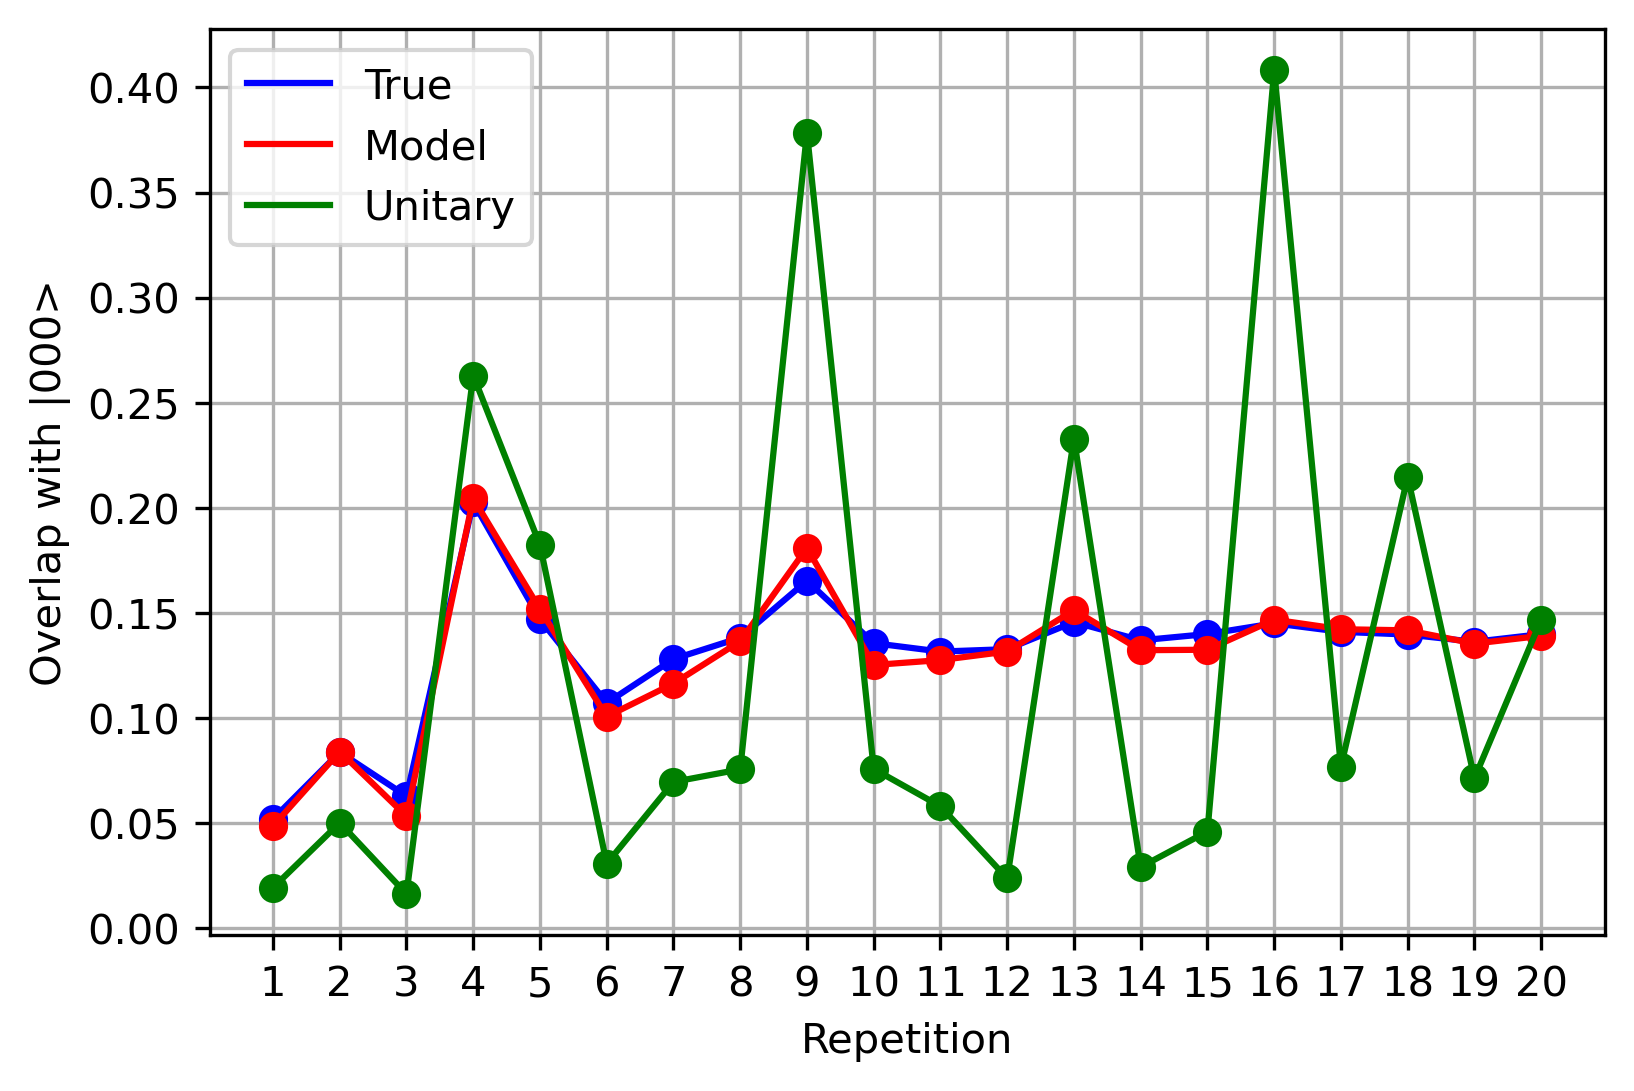

In [17]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex128)
state_model = tf.cast(state_model, dtype=tf.complex128)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex128)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_list[5000:])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.povm), observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |000>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()